In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
from functools import partial
from tqdm import tqdm

import bases
import eigensolvers
import functionals
import generators
import otrhogonalizations
import representations
import reconstructions
import utils

In [2]:
def get_basis(degree=5):
    basis = partial(bases.fourier_basis, degree=degree, combinations=True)
    return basis

def show_basis_function(domain, values, idx='all'):
    if isinstance(idx, int):
        plt.plot(domain, values[:,idx])
    elif idx == 'all':
        for i in range(len(values.shape[1])):
            plt.plot(domain, values[:,i])
    else:
        raise ValueError("invalid idx")
    plt.show()

def show_orthogonality(degree, N):
    d_max = np.pi
    d_min = -np.pi
    step_size = (d_max - d_min) / N
    domain = np.linspace(d_min, d_max, num=N)
    basis = get_basis(degree)
    values = np.array([basis(e) for e in domain]).squeeze()
    _, M = values.shape
    ip_matrix = np.empty((M, M))
    for i in range(M):
        for j in range(M):
            ip_matrix[i,j] = abs(np.inner(values[:,i], values[:,j].conj()) * step_size)
    names = [f"exp({k}ix)" for k in range(-degree, degree+1, 1)]
    df = pd.DataFrame(ip_matrix, index=names, columns=names)
    fig, ax = plt.subplots(figsize=(16,12))
    ax.set_title("Inner product values")
    sns.heatmap(df, vmin=0, vmax=1, linewidth=0.5, ax=ax, annot=True, fmt='.2f')
    plt.show()

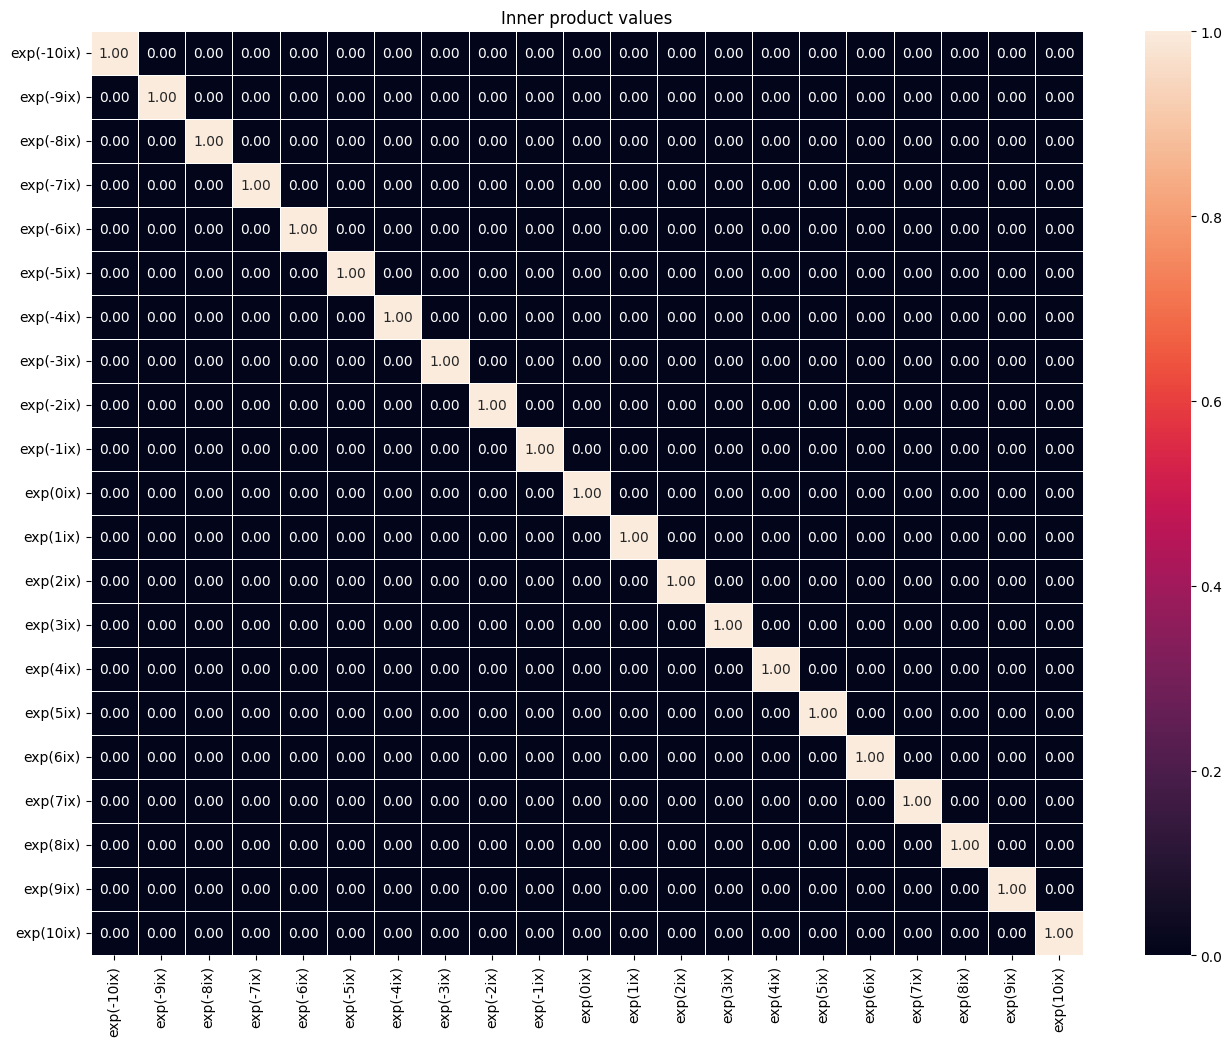

In [3]:
N = 500
DEG = 10
show_orthogonality(DEG, N)